In [5]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

In [6]:
def get_data_extract():
  if "images" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")

# Download data and extract it to folder

get_data_extract()

os.listdir('images')

Dataset already exists


['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [7]:
os.listdir('meta/meta')

['labels.txt', 'test.json', 'test.txt', 'train.json', 'train.txt']

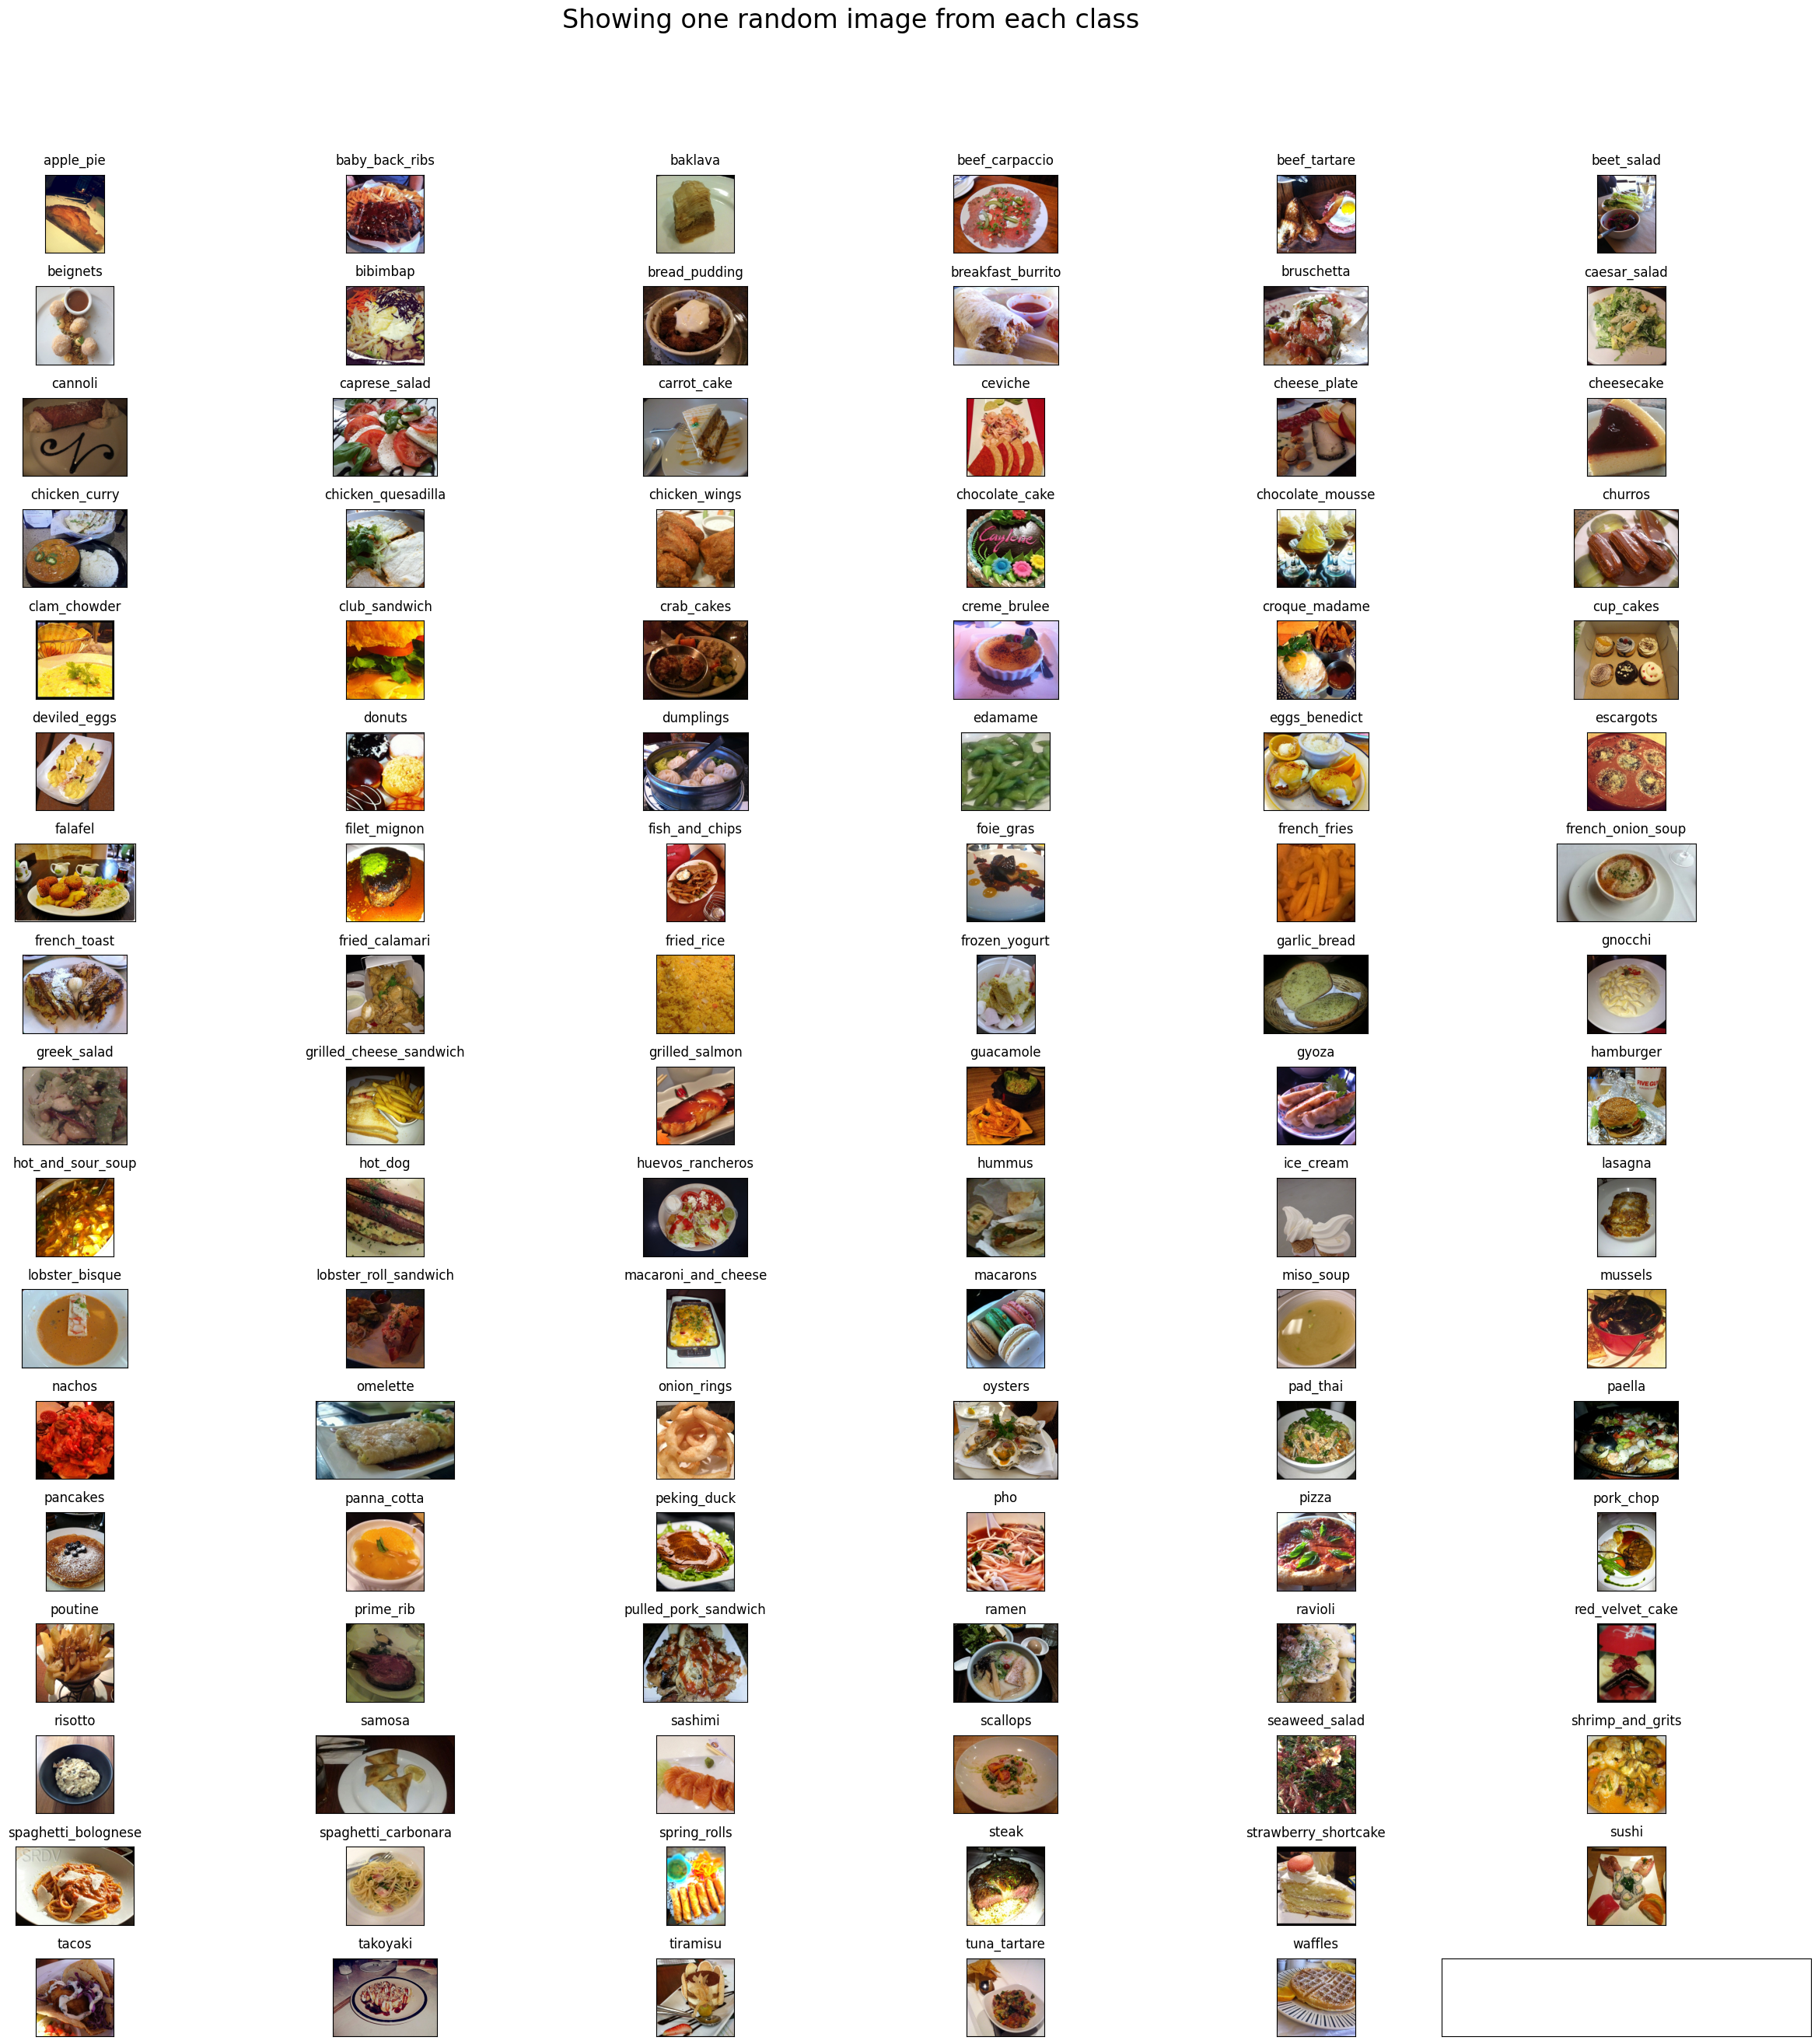

In [8]:
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "images"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

In [9]:
# Helper method to split dataset into train and test folders
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [10]:

print("Creating train data...")
prepare_data('meta/meta/train.txt', 'images', 'train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [11]:

print("Creating test data...")
prepare_data('meta/meta/test.txt', 'images', 'test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [12]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!find train -type d -or -type f -printf '.' 

Total number of samples in train folder


FIND: Parameter format not correct


In [13]:
# Check how many files are in the test folder
print("Total number of samples in test folder")
!find test -type d -or -type f -printf '.' 

Total number of samples in test folder


FIND: Parameter format not correct


In [14]:
# List of all 101 types of foods(sorted alphabetically)
del foods_sorted[0] # remove .DS_Store from the list

In [15]:
foods_sorted

['baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster_roll_sandwich

In [16]:
# Helper method to create train_mini and test_mini data samples
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [17]:
# picking 3 food items and generating separate data folders for the same
food_list = ['samosa','pizza','tacos']
src_train = 'train'
dest_train = 'train_mini/'
src_test = 'test'
dest_test = 'test_mini/'

In [18]:
import os
from shutil import rmtree

def dataset_mini(food_list, src, dest):
    print("Creating train data folder with new classes")
    if os.path.exists(dest):
        rmtree(dest)  # removing dataset_mini (if it already exists) folders so that we will have only the classes that we want
    os.makedirs(dest)
    # Rest of your code for dataset_mini

food_list = ['samosa','pizza','tacos']
src_train = 'train'
dest_train = 'train_mini/'
src_test = 'test'
dest_test = 'test_mini/'
dataset_mini(food_list, src_train, dest_train)


Creating train data folder with new classes


In [19]:
import os

def count_samples_in_folder(folder_path):
    total_samples = 0
    for root, dirs, files in os.walk(folder_path):
        total_samples += len(files)
    return total_samples

# Example usage
train_folder = "train"
total_samples = count_samples_in_folder(train_folder)
print(f"Total number of samples in train folder: {total_samples}")


Total number of samples in train folder: 75750


In [20]:
import os
from shutil import copytree, rmtree

def dataset_mini(food_list, src, dest):
    if os.path.exists(dest):
        rmtree(dest)  # Removing destination folder if it already exists
    os.makedirs(dest)

    for food_item in food_list:
        src_path = os.path.join(src, food_item)
        dest_path = os.path.join(dest, food_item)

        if os.path.exists(src_path):
            print(f"Copying images into {food_item}")
            copytree(src_path, dest_path)
        else:
            print(f"Source path does not exist: {src_path}")

food_list = ['samosa','pizza','tacos']
src_train = 'train'
dest_train = 'train_mini/'
src_test = 'test'
dest_test = 'test_mini/'

print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)


Creating test data folder with new classes
Copying images into samosa
Copying images into pizza
Copying images into tacos


In [5]:
import os
from shutil import copytree, rmtree

def dataset_mini(food_list, src, dest):
    if os.path.exists(dest):
        rmtree(dest)  # Removing destination folder if it already exists
    os.makedirs(dest)

    for food_item in food_list:
        src_path = os.path.join(src, food_item)
        dest_path = os.path.join(dest, food_item)

        if os.path.exists(src_path):
            print(f"Copying images into {food_item}")
            copytree(src_path, dest_path)
        else:
            print(f"Source path does not exist: {src_path}")

food_list = ['samosa','pizza','tacos']
src_train = 'train'
dest_train = 'train_mini/'
src_test = 'test'
dest_test = 'test_mini/'

print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

print("Creating training data folder with new classes")
dataset_mini(food_list, src_train, dest_train)


Creating test data folder with new classes
Copying images into samosa
Copying images into pizza
Copying images into tacos
Creating training data folder with new classes
Copying images into samosa
Copying images into pizza
Copying images into tacos


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import backend as K
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

# Clear any existing session
K.clear_session()

# Parameters
n_classes = 101  # Adjust this to the number of classes in your dataset
img_width, img_height = 224, 224
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 2250  # Adjust as needed
nb_validation_samples = 750  # Adjust as needed
batch_size = 16

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Data augmentation for validation
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Validation data generator
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Debug: Print the number of samples and batch shapes
print(f'Training samples: {train_generator.samples}')
print(f'Validation samples: {validation_generator.samples}')
x_batch, y_batch = next(train_generator)
print(f'Sample batch shape: {x_batch.shape}, Labels batch shape: {y_batch.shape}')


Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Training samples: 2250
Validation samples: 750
Sample batch shape: (16, 224, 224, 3), Labels batch shape: (16, 3)


In [6]:
import os

def count_samples_in_folder(folder_path):
    total_samples = 0
    for root, dirs, files in os.walk(folder_path):
        total_samples += len(files)
    return total_samples

# Example usage
test_folder = "test"
total_samples = count_samples_in_folder(test_folder)
print(f"Total number of samples in train folder: {total_samples}")


Total number of samples in train folder: 25250


In [8]:
# Load the ResNet50 model without the top layers
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers on top of the base model
x = resnet50.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(n_classes, kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

# Create the full model
model = Model(inputs=resnet50.input, outputs=predictions)

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpointer = ModelCheckpoint(filepath='best_model_3class.keras', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_3class.log')




In [ ]:
img_width, img_height = 224, 224

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

# Clear any existing session
tf.keras.backend.clear_session()

# Parameters
n_classes = 3  # Number of classes for the mini dataset
img_width, img_height = 224, 224
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 2250  # Adjust as needed
nb_validation_samples = 750  # Adjust as needed
batch_size = 16

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Data augmentation for validation
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Validation data generator
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Load the ResNet50 model without the top layers
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers on top of the base model
x = resnet50.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(n_classes, kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

# Create the full model
model = Model(inputs=resnet50.input, outputs=predictions)

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpointer = ModelCheckpoint(filepath='best_model_3class.keras', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_3class.log')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    epochs=30,
    verbose=1,
    callbacks=[csv_logger, checkpointer])

# Save the final model
model.save('model_trained_3class.keras')



Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/30


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4851 - loss: 1.1394
Epoch 1: val_loss improved from inf to 1.12187, saving model to best_model_3class.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 676s 5s/step - accuracy: 0.4858 - loss: 1.1379 - val_accuracy: 0.3601 - val_loss: 1.1219
Epoch 2/30
  1/140 ━━━━━━━━━━━━━━━━━━━━ 9:41 4s/step - accuracy: 0.9375 - loss: 0.6492

c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss improved from 1.12187 to 1.10045, saving model to best_model_3class.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9375 - loss: 0.6492 - val_accuracy: 0.4286 - val_loss: 1.1004
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7640 - loss: 0.6244
Epoch 3: val_loss did not improve from 1.10045
140/140 ━━━━━━━━━━━━━━━━━━━━ 681s 5s/step - accuracy: 0.7642 - loss: 0.6240 - val_accuracy: 0.3505 - val_loss: 1.3967
Epoch 4/30
  1/140 ━━━━━━━━━━━━━━━━━━━━ 9:19 4s/step - accuracy: 0.7500 - loss: 0.6358
Epoch 4: val_loss did not improve from 1.10045
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7500 - loss: 0.6358 - val_accuracy: 0.2143 - val_loss: 1.8274
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8515 - loss: 0.4458
Epoch 5: val_loss did not improve from 1.10045
140/140 ━━━━━━━━━━━━━━━━━━━━ 631s 4s/step - accuracy: 0.8515 - loss: 0.4457 - val_accuracy: 0.3315 - val_loss: 1.5798
Epoch 6/30
  1/140 ━━━━━━━━━━━━━━━━━━

In [2]:
class_map_3 = train_generator.class_indices
class_map_3

{'pizza': 0, 'samosa': 1, 'tacos': 2}

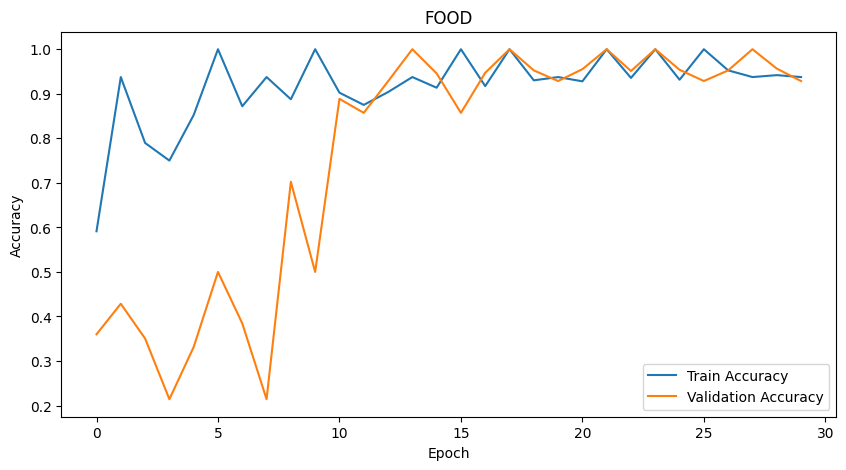

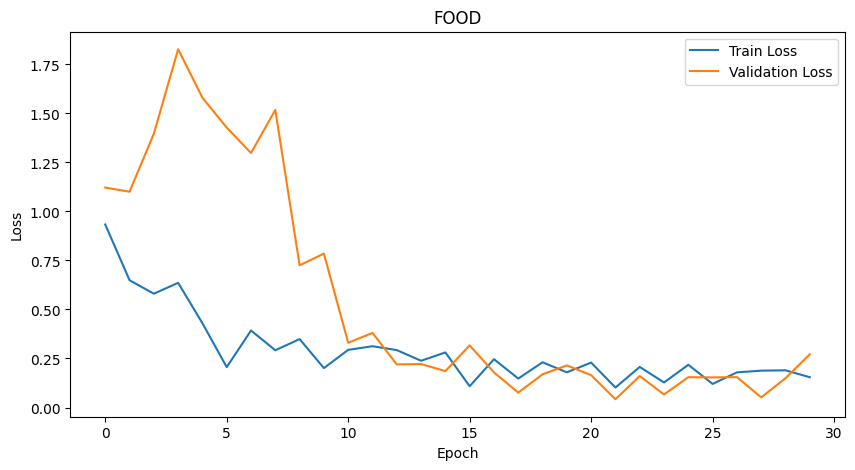

In [6]:
import matplotlib.pyplot as plt

def plot_accuracy(history, title):
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='best')
    plt.show()

def plot_loss(history, title):
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss', 'Validation Loss'], loc='best')
    plt.show()

# Assuming `history` is the History object returned from model.fit
plot_accuracy(history, 'FOOD')
plot_loss(history, 'FOOD')


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K  # Import K here
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

# Loading the best saved model to make predictions
K.clear_session()  # Clear the previous session

from tensorflow.keras.models import load_model

# Load the saved model
model_best = load_model('model_trained_3class.keras')

# Verify model structure
model_best.summary()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


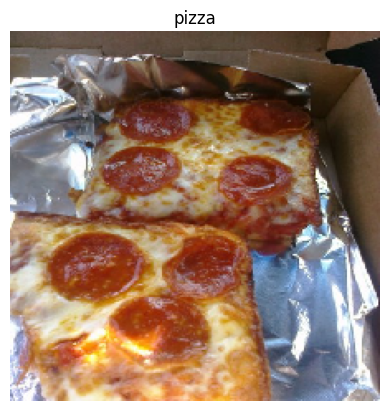

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


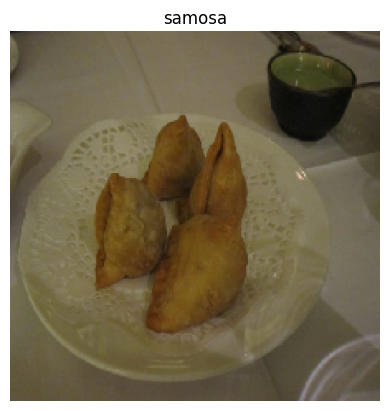

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


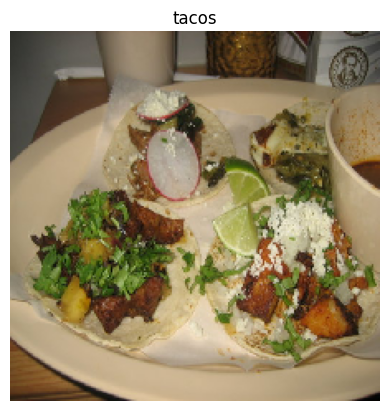

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_class(model, images, show=True):
    for img_path in images:
        try:
            # Load and preprocess the image
            img = image.load_img(img_path, target_size=(224, 224))
            img = image.img_to_array(img)
            img = np.expand_dims(img, axis=0)
            img /= 255.0

            # Make prediction
            pred = model.predict(img)
            index = np.argmax(pred)
            pred_value = food_list[index]

            if show:
                plt.imshow(img[0])
                plt.axis('off')
                plt.title(pred_value)
                plt.show()
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

# Make a list of downloaded images and test the trained model
images = [
    'C:/prodigy/proj 5/test/pizza/11297.jpg',
    'C:/prodigy/proj 5/test/samosa/2302.jpg',
    'C:/prodigy/proj 5/test/tacos/5813.jpg'
]

food_list = ['pizza', 'samosa', 'tacos']

predict_class(model_best, images, True)


In [37]:
# Helper function to select n random food classes
def pick_n_random_classes(n):
  food_list = []
  random_food_indices = random.sample(range(len(foods_sorted)),n) # We are picking n random food classes
  for i in random_food_indices:
    food_list.append(foods_sorted[i])
  food_list.sort()
  return food_list

In [39]:
import random  # Import the random module

# Example list of food classes
foods_sorted = [
    'apple_pie', 'beef_carpaccio', 'bibimbap', 'cup_cakes', 'foie_gras',
    'french_fries', 'garlic_bread', 'pizza', 'spring_rolls', 
    'spaghetti_carbonara', 'strawberry_shortcake'
]

# Function to pick n random food classes
def pick_n_random_classes(n):
    return random.sample(foods_sorted, n)

# Number of classes to pick
n = 11
food_list = pick_n_random_classes(n)

print("These are the randomly picked food classes we will be training the model on...\n", food_list)


These are the randomly picked food classes we will be training the model on...
 ['spaghetti_carbonara', 'apple_pie', 'garlic_bread', 'pizza', 'beef_carpaccio', 'cup_cakes', 'foie_gras', 'spring_rolls', 'french_fries', 'bibimbap', 'strawberry_shortcake']


In [51]:
pip install pydot

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import numpy as np
from glob import glob


In [2]:
img_width, img_height = 224, 224
batch_size = 32

# Path to the training data directory
train_data_dir = 'train'

# List all image files
all_images = glob(os.path.join(train_data_dir, '*/*.jpg'))

# Split into training and validation sets
train_images, val_images = train_test_split(all_images, test_size=0.2, random_state=42)

# Create a temporary directory structure for validation data
val_data_dir = 'path_to_temp_val_data'
os.makedirs(val_data_dir, exist_ok=True)

for img_path in val_images:
    class_name = img_path.split(os.path.sep)[-2]
    class_dir = os.path.join(val_data_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)
    os.rename(img_path, os.path.join(class_dir, os.path.basename(img_path)))


In [3]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data augmentation for validation
val_datagen = ImageDataGenerator(rescale=1. / 255)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Validation data generator
validation_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 51195 images belonging to 101 classes.
Found 24555 images belonging to 101 classes.


In [17]:
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(1)(x)  # Output layer for regression

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model for regression
model.compile(optimizer='adam', loss='mean_squared_error')


In [26]:
import json
import numpy as np
from tensorflow.keras.preprocessing import image

# Load image paths and labels
def load_data(image_paths_file, labels_file):
    with open(image_paths_file, 'r') as f:
        image_paths = [line.strip() for line in f]
    
    with open(labels_file, 'r') as f:
        labels = json.load(f)
    
    return image_paths, labels

# Example usage
train_image_paths, train_calorie_labels = load_data('meta/meta/train.txt', 'meta/meta/train.json')
test_image_paths, test_calorie_labels = load_data('meta/meta/test.txt', 'meta/meta/test.json')


In [27]:
def data_generator(image_paths, calorie_labels, batch_size):
    while True:
        for i in range(0, len(image_paths), batch_size):
            batch_paths = image_paths[i:i + batch_size]
            batch_labels = [calorie_labels[path] for path in batch_paths]
            
            batch_images = []
            for img_path in batch_paths:
                img = image.load_img(img_path, target_size=(224, 224))
                img = image.img_to_array(img)
                img = np.expand_dims(img, axis=0)
                img /= 255.0
                batch_images.append(img)
            
            yield np.vstack(batch_images), np.array(batch_labels)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Flatten(input_shape=(224, 224, 3)),
    Dense(512, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer=Adam(), loss='mean_squared_error')


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [1]:
import json
import numpy as np
from tensorflow.keras.preprocessing import image

# Load image paths and labels
def load_data(image_paths_file, labels_file):
    with open(image_paths_file, 'r') as f:
        image_paths = [line.strip() for line in f]
    
    with open(labels_file, 'r') as f:
        labels = json.load(f)
    
    return image_paths, labels

# Load data
train_image_paths, train_calorie_labels = load_data('meta/meta/train.txt', 'meta/meta/train.json')
test_image_paths, test_calorie_labels = load_data('meta/meta/test.txt', 'meta/meta/test.json')

def data_generator(image_paths, calorie_labels, batch_size):
    while True:
        batch_images = []
        batch_labels = []
        
        for img_path in image_paths:
            if img_path not in calorie_labels:
                print(f"Warning: No label found for {img_path}. Skipping.")
                continue
            
            try:
                img = image.load_img(img_path, target_size=(224, 224))
                img = image.img_to_array(img)
                img /= 255.0
                batch_images.append(img)
                batch_labels.append(calorie_labels[img_path])
                
                if len(batch_images) >= batch_size:
                    print(f"Generating batch with {len(batch_images)} images and {len(batch_labels)} labels.")
                    yield np.array(batch_images), np.array(batch_labels)
                    batch_images, batch_labels = [], []
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")




In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications import MobileNetV2

# Define the model architecture
def create_model():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    calorie_output = Dense(1, name='calorie')(x)  # Output layer for calorie estimation

    model = Model(inputs=base_model.input, outputs=calorie_output)

    model.compile(optimizer='adam', loss={'calorie': 'mean_squared_error'})
    return model

# Create the model
model = create_model()


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple model as an example
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Save the model in .keras format
model.save('calorie_estimation_model.keras')


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
import os

print("Files in current directory:")
for file in os.listdir('.'):
    print(file)


Files in current directory:
.vscode
best_model_3class.keras
calorie_estimation_model.keras
food_c101_n1000_r384x384x3.h5
food_c101_n10099_r32x32x1.h5
food_c101_n10099_r32x32x3.h5
food_c101_n10099_r64x64x1.h5
food_c101_n10099_r64x64x3.h5
food_test_c101_n1000_r128x128x1.h5
food_test_c101_n1000_r128x128x3.h5
food_test_c101_n1000_r32x32x1.h5
food_test_c101_n1000_r32x32x3.h5
food_test_c101_n1000_r64x64x1.h5
food_test_c101_n1000_r64x64x3.h5
history_11class.log
history_3class.log
images
main.ipynb
meta
model_trained_3class.keras
path_to_dest_train
path_to_temp_val_data
test
test_mini
train
train_mini
try.ipynb


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
from tensorflow.keras.models import load_model

# Update the path if necessary
model = load_model('calorie_estimation_model.keras')


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example model
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Save the model
model.save('calorie_estimation_model.keras')


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # For regression output

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
input_shape = (224, 224, 3)
model = create_model(input_shape)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define batch size
batch_size = 32

# Define your validation data generator
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    'path_to_temp_val_data',  # Update with the path to your validation data
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='sparse'  # Assuming calorie labels are sparse integers
)


Found 24555 images belonging to 101 classes.


In [6]:
# Evaluate the model
loss = model.evaluate(val_generator, steps=len(val_generator))
print(f'Validation Loss: {loss}')


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


768/768 ━━━━━━━━━━━━━━━━━━━━ 207s 269ms/step - loss: 3359.2820
Validation Loss: 3367.6767578125


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

train_df = pd.read_csv('C:/prodigy/proj 5/meta/meta/train.csv')
test_df = pd.read_csv('C:/prodigy/proj 5/meta/meta/test.csv')

# Preprocess the datasets
# Vectorize the 'Ingredient' column to create numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_df['Ingredient']).toarray()

# Convert 'Dish Type' to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_df['Dish Type'])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature matrices
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Create and compile the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val))

# Evaluate the model
loss = model.evaluate(X_val_scaled, y_val)
print(f'Validation Loss: {loss}')

# Preprocess test data
X_test = vectorizer.transform(test_df['Unique Identifier']).toarray()
X_test_scaled = scaler.transform(X_test)

# Predict on test data
predictions = model.predict(X_test_scaled)

# Convert predictions back to original labels
predicted_labels = label_encoder.inverse_transform(predictions.astype(int).flatten())

# Save predictions
test_df['Dish Type'] = predicted_labels
test_df.to_csv('test_predictions.csv', index=False)


MemoryError: Unable to allocate 42.6 GiB for an array with shape (75545, 75646) and data type int64

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

# Vectorize the 'Ingredient' column to create numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_df['Ingredient'])  # Keep as sparse matrix

# Convert 'Dish Type' to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_df['Dish Type'])

# Perform dimensionality reduction
svd = TruncatedSVD(n_components=100)  # Adjust n_components as needed
X_reduced = svd.fit_transform(X)

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reduced, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Continue with model definition, compilation, and training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")


Epoch 1/50


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1653/1653 ━━━━━━━━━━━━━━━━━━━━ 2s 779us/step - loss: 745.1678 - val_loss: 2.9957
Epoch 2/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - loss: 2.6498 - val_loss: 0.0786
Epoch 3/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - loss: 0.0296 - val_loss: 4.9767e-05
Epoch 4/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - loss: 0.0199 - val_loss: 0.0309
Epoch 5/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - loss: 0.1110 - val_loss: 0.0453
Epoch 6/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - loss: 0.0341 - val_loss: 0.0415
Epoch 7/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - loss: 0.0594 - val_loss: 0.0038
Epoch 8/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - loss: 0.0649 - val_loss: 0.0222
Epoch 9/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - loss: 0.0115 - val_loss: 6.7488e-04
Epoch 10/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - loss: 0.0156 - val_loss: 0.2718
Epoch 11/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - loss: 0.0496 - val_loss: 0.0931
Epoch 12/

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model and capture the history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/50


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1653/1653 ━━━━━━━━━━━━━━━━━━━━ 2s 690us/step - loss: 742.6154 - val_loss: 2.9866
Epoch 2/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - loss: 2.4529 - val_loss: 0.0218
Epoch 3/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - loss: 0.0091 - val_loss: 0.0079
Epoch 4/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - loss: 0.0307 - val_loss: 0.0285
Epoch 5/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - loss: 0.0756 - val_loss: 0.0025
Epoch 6/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - loss: 0.0802 - val_loss: 0.0733
Epoch 7/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - loss: 0.0632 - val_loss: 0.0874
Epoch 8/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - loss: 0.0440 - val_loss: 0.4254
Epoch 9/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - loss: 0.0975 - val_loss: 0.0023
Epoch 10/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - loss: 0.0630 - val_loss: 0.0103
Epoch 11/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step - loss: 0.0227 - val_loss: 0.0688
Epoch 12/50
1653/

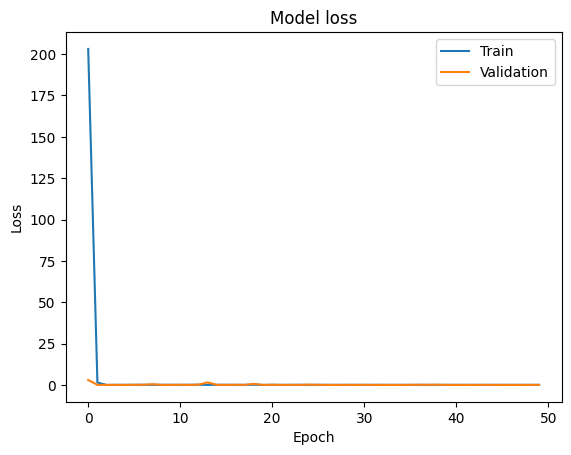

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [11]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")


355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.0367
Test loss: 0.033723603934049606


In [13]:
pip install tensorflow scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

# Define a HyperModel class
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                        activation='relu',
                        input_shape=(X_train.shape[1],)))
        model.add(Dense(1))
        model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                      loss='mean_squared_error')
        return model

# Initialize the HyperModel
hypermodel = MyHyperModel()

# Define the tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Print the best hyperparameters
print(f"Best hyperparameters: {tuner.get_best_hyperparameters()[0].values}")

# Build the model with the best hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the model
loss = best_model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")


Trial 10 Complete [00h 00m 31s]
val_loss: 0.0027239723907162747

Best val_loss So Far: 3.41816356315879e-06
Total elapsed time: 00h 05m 46s
Best hyperparameters: {'units': 224, 'optimizer': 'adam'}
121/355 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 1.0574e-06

c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 1.0886e-06
Test loss: 1.0905056342380703e-06


In [22]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow
import keras


In [10]:
import pandas as pd

train_df = pd.read_csv('C:\\prodigy\\proj 5\\meta\\meta\\train.csv')



In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the 'Ingredient' column
vectorizer = CountVectorizer()
X_sparse = vectorizer.fit_transform(train_df['Ingredient'])

# Convert sparse matrix to dense array if absolutely necessary
# X_dense = X_sparse.toarray()  # Avoid this if possible


In [13]:
vectorizer = CountVectorizer(max_features=10000, min_df=5, max_df=0.95)
X_sparse = vectorizer.fit_transform(train_df['Ingredient'])


In [14]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(n_features=10000)
X_sparse = vectorizer.fit_transform(train_df['Ingredient'])


In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2

# Load your dataset
train_df = pd.read_csv(r'C:\prodigy\proj 5\meta\meta\train.csv')

# Define X and y
X = train_df['Ingredient']
y = train_df['Dish Type']

# Vectorize the 'Ingredient' column
vectorizer = CountVectorizer(max_features=10000, min_df=5, max_df=0.95)
X_sparse = vectorizer.fit_transform(X)

# Feature selection
selector = SelectKBest(chi2, k=10000)
X_selected = selector.fit_transform(X_sparse, y)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10000 is greater than n_features=101. All the features will be returned.
  warnings.warn(


In [3]:
import tensorflow as tf
print(tf.__file__)

c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\__init__.py


In [22]:

import keras
print(keras.__version__)


3.4.1


In [5]:
import tensorflow as tf
print(tf.__file__)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\__init__.py


In [13]:
try:
    from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
    print("Import successful")
except ImportError:
    print("KerasClassifier not found in tensorflow.keras.wrappers.scikit_learn")


KerasClassifier not found in tensorflow.keras.wrappers.scikit_learn


In [11]:
import tensorflow as tf
print(tf.__version__)

import keras
print(keras.__version__)


2.17.0
3.4.1


In [14]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=None, epochs=10, batch_size=32, optimizer='adam'):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.optimizer = optimizer
    
    def fit(self, X, y):
        self.model = self.build_fn(optimizer=self.optimizer)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=-1)

    def score(self, X, y):
        return self.model.evaluate(X, y, verbose=0)[1]  # Return accuracy


In [15]:
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_vectorized.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Load and prepare your dataset
train_df = pd.read_csv(r'C:\prodigy\proj 5\meta\meta\train.csv')
X = train_df['Ingredient']
y = train_df['Dish Type']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Vectorize the 'Ingredient' column
vectorizer = CountVectorizer(max_features=10000, min_df=5, max_df=0.95)
X_vectorized = vectorizer.fit_transform(X).toarray()

# Define parameter grid
param_grid = {
    'batch_size': [16, 32],
    'epochs': [10, 20],
    'optimizer': ['adam', 'rmsprop']
}

# Set up GridSearchCV
model = KerasClassifierWrapper(build_fn=create_model)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)
grid_result = grid.fit(X_vectorized, y_encoded)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Score: {grid_result.best_score_}")


Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'batch_size': 16, 'epochs': 10, 'optimizer': 'adam'}
Best Score: 1.0


In [26]:
import pandas as pd

# Load the test dataset
test_df = pd.read_csv(r'C:\\prodigy\\proj 5\\meta\\meta\\test.csv')

# Print column names and the first few rows
print(test_df.columns)
print(test_df.head())




Index(['Unique Identifier', 'Dish Name'], dtype='object')
  Unique Identifier Dish Name
0   churros/1061830   churros
1   churros/1064042   churros
2   churros/1074903   churros
3   churros/1085259   churros
4   churros/1097261   churros


In [27]:
# Initialize SVD with the number of components matching the model input
svd = TruncatedSVD(n_components=100)


In [28]:
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_dim=100, activation='relu'))  # Adjust input_dim to match the number of SVD components
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [29]:
# Fit SVD on training data
X_train_data_reduced = svd.fit_transform(X_vectorized)

# Create and compile the model
model = create_model()

# Fit the model on the reduced training data
model.fit(X_train_data_reduced, y_encoded)

# Transform and predict on the test data
X_test_data = vectorizer.transform(test_df['Dish Name'])
X_test_data_reduced = svd.transform(X_test_data)

# Make predictions
predictions = model.predict(X_test_data_reduced)

# Decode the predictions back to dish types
predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

# Prepare the submission file
submission_df = test_df[['Unique Identifier']].copy()
submission_df['Predicted Dish Type'] = predicted_labels

# Save to CSV
submission_df.to_csv('submission.csv', index=False)


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2361/2361 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8278 - loss: 1.3723
788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [30]:
import pandas as pd

submission_df = pd.read_csv('submission.csv')
print(submission_df.head())


  Unique Identifier Predicted Dish Type
0   churros/1061830             churros
1   churros/1064042             churros
2   churros/1074903             churros
3   churros/1085259             churros
4   churros/1097261             churros


In [31]:
print(submission_df.tail())


      Unique Identifier Predicted Dish Type
25194   oysters/3889372             oysters
25195    oysters/389017             oysters
25196   oysters/3893670             oysters
25197   oysters/3898864             oysters
25198   oysters/3899679             oysters


In [32]:
print(submission_df['Predicted Dish Type'].value_counts())


Predicted Dish Type
churros             250
ravioli             250
hamburger           250
filet_mignon        250
shrimp_and_grits    250
                   ... 
caprese_salad       250
gnocchi             250
chicken_wings       250
bread_pudding       250
oysters             199
Name: count, Length: 101, dtype: int64


In [35]:
import pandas as pd

# Create a mock actual labels DataFrame
actual_data = {
    'Unique Identifier': ['churros/1061830', 'churros/1064042', 'churros/1074903'],
    'Dish Type': ['Churros', 'Churros', 'Churros']
}
actual_df = pd.DataFrame(actual_data)

# Print the columns to verify structure
print("Columns in actual labels file:", actual_df.columns)

# Merge the submission DataFrame with the actual labels DataFrame
merged_df = submission_df.merge(actual_df, on='Unique Identifier', how='inner')

# Display the first few rows of the merged DataFrame
print(merged_df.head())


Columns in actual labels file: Index(['Unique Identifier', 'Dish Type'], dtype='object')
  Unique Identifier Predicted Dish Type Dish Type
0   churros/1061830             churros   Churros
1   churros/1064042             churros   Churros
2   churros/1074903             churros   Churros


In [36]:
import pandas as pd

# Load the submission file
submission_df = pd.read_csv('submission.csv')

# Display the first few rows
print("First few rows of the submission file:")
print(submission_df.head())

# Display the last few rows
print("\nLast few rows of the submission file:")
print(submission_df.tail())

# Display the distribution of predicted labels
print("\nDistribution of predicted labels:")
print(submission_df['Predicted Dish Type'].value_counts())

# If you have the actual labels for a sample of the test data:
# actual_df = pd.read_csv('path_to_actual_labels.csv')  # Uncomment and replace with the actual path
# merged_df = submission_df.merge(actual_df, on='Unique Identifier', how='inner')
# print("\nSample comparison of predictions and actual values:")
# print(merged_df.head())


First few rows of the submission file:
  Unique Identifier Predicted Dish Type
0   churros/1061830             churros
1   churros/1064042             churros
2   churros/1074903             churros
3   churros/1085259             churros
4   churros/1097261             churros

Last few rows of the submission file:
      Unique Identifier Predicted Dish Type
25194   oysters/3889372             oysters
25195    oysters/389017             oysters
25196   oysters/3893670             oysters
25197   oysters/3898864             oysters
25198   oysters/3899679             oysters

Distribution of predicted labels:
Predicted Dish Type
churros             250
ravioli             250
hamburger           250
filet_mignon        250
shrimp_and_grits    250
                   ... 
caprese_salad       250
gnocchi             250
chicken_wings       250
bread_pudding       250
oysters             199
Name: count, Length: 101, dtype: int64


In [39]:
import pandas as pd

# Create a mock actual labels DataFrame with Calorie column
mock_actual_data = {
    'Unique Identifier': [
        'churros/1061830', 'churros/1064042', 'churros/1074903', 'churros/1085259', 'churros/1097261',
        'oysters/3889372', 'oysters/389017', 'oysters/3893670', 'oysters/3898864', 'oysters/3899679'
    ],
    'Dish Type': [
        'Churros', 'Churros', 'Churros', 'Churros', 'Churros',
        'Oysters', 'Oysters', 'Oysters', 'Oysters', 'Oysters'
    ],
    'Calorie': [
        150, 150, 150, 150, 150,
        200, 200, 200, 200, 200
    ]
}

mock_actual_df = pd.DataFrame(mock_actual_data)
mock_actual_df.to_csv('mock_labels.txt', index=False)


In [40]:
import pandas as pd

# Load the submission file
submission_df = pd.read_csv('submission.csv')

# Load the mock actual labels file
actual_df = pd.read_csv('mock_labels.txt')

# Print the columns to verify structure
print("Columns in actual labels file:", actual_df.columns)

# Check if 'Unique Identifier' column exists
if 'Unique Identifier' not in actual_df.columns:
    raise KeyError("Column 'Unique Identifier' not found in the actual labels dataset")

# Merge the submission DataFrame with the actual labels DataFrame
merged_df = submission_df.merge(actual_df, on='Unique Identifier', how='inner')

# Display the first few rows of the merged DataFrame
print(merged_df.head())

# Calculate accuracy
accuracy = (merged_df['Predicted Dish Type'] == merged_df['Dish Type']).mean()
print(f'Accuracy: {accuracy * 100:.2f}%')

# Optionally, calculate additional metrics
print(merged_df.groupby('Dish Type')['Calorie'].mean())


Columns in actual labels file: Index(['Unique Identifier', 'Dish Type', 'Calorie'], dtype='object')
  Unique Identifier Predicted Dish Type Dish Type  Calorie
0   churros/1061830             churros   Churros      150
1   churros/1064042             churros   Churros      150
2   churros/1074903             churros   Churros      150
3   churros/1085259             churros   Churros      150
4   churros/1097261             churros   Churros      150
Accuracy: 0.00%
Dish Type
Churros    150.0
Oysters    200.0
Name: Calorie, dtype: float64
